[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# Features Transform case2

Polynomial and Coordinate Change Feature Transform as a Pipeline.

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 16/03/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0037FeaturesTransform.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.base import TransformerMixin
from sklearn.datasets import make_circles
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

# Image Processing

# Machine Learning

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [3]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2

In [4]:
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import PlotBinaryClassData, PlotDecisionBoundaryClosure


In [5]:
# General Auxiliary Functions


## Features Transform

In this exercise we'll apply a feature transform to solve a classification problem.  
We'll apply 2 different transforms:

1. Polynomial Transform  
2. Polar Coordinates.

In the exercise we'll learn about 2 features of SciKit Learn:

1. Pre Processing Module.
2. Pipelines.

The tasks are:

1. Train a linear SVM classifier on the data to have a base line.
2. Apply polynomial feature transform using [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).
3. Train a linear SVM classifier on the transformed features.
4. Change coordinates of the original features to [Polar Coordinate System](https://en.wikipedia.org/wiki/Polar_coordinate_system).
5. Train a linear SVM classifier on the transformed features.


* <font color='brown'>(**#**)</font> See [Data Science - List of Feature Engineering Techniques](https://datascience.stackexchange.com/questions/12984).
* <font color='brown'>(**#**)</font> See [Data Science - Tools for Feature Engineering](https://datascience.stackexchange.com/questions/8286).
* <font color='brown'>(**#**)</font> See [SciKit Learn's Time Related Feature Engineering](https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html).
* <font color='brown'>(**#**)</font> [FeatureTools](https://github.com/alteryx/featuretools) is a well known tool for feature generation.
* <font color='brown'>(**#**)</font> Some useful tutorials on Feature Engineering are given in: [Feature Engine](https://github.com/feature-engine/feature_engine), [Feature Engine Examples](https://github.com/feature-engine/feature-engine-examples), [Python Feature Engineering Cookbook - Jupyter Notebooks](https://github.com/PacktPublishing/Python-Feature-Engineering-Cookbook).

In [6]:
# Parameters

# Data Generation
numSamples = 250 #<! Per Quarter

# Pre Processing
polyDeg = 2

# Model
paramC      = 1
kernelType  = 'linear'
lC          = [0.1, 0.25, 0.75, 1, 1.5, 2, 3]

# Data Visualization
numGridPts = 500


## Generate / Load Data


In [7]:
# Generate Data 

mX, vY  = make_circles(n_samples = numSamples, shuffle = True, noise = 0.075, factor = 0.50)

PlotDecisionBoundary = PlotDecisionBoundaryClosure(numGridPts, -1.5, 1.5, -1.5, 1.5)

print(f'The features data shape: {mX.shape}')
print(f'The labels data shape: {vY.shape}')
print(f'The unique values of the labels: {np.unique(vY)}')

The features data shape: (250, 2)
The labels data shape: (250,)
The unique values of the labels: [0 1]


### Plot Data

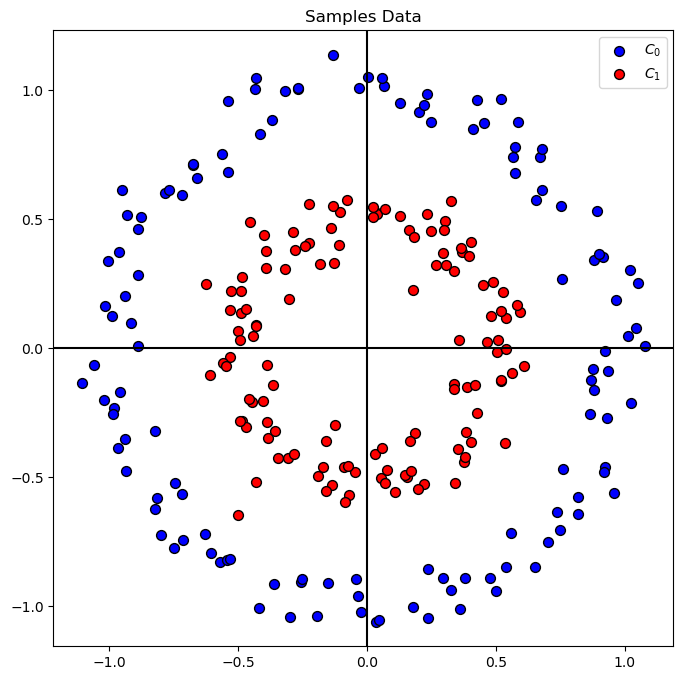

In [8]:
# Plot the Data

hA = PlotBinaryClassData(mX, vY, axisTitle = 'Samples Data')

## Train a Linear SVM Model

In this section we'll try optimize the best _Linear SVM_ model for the problem. 

* <font color='red'>(**?**)</font> What do you think the decision boundary will be?

In [9]:
# SVM Linear Model
# Optimize the `C` hyper parameter of the linear SVM model.

vAcc = np.zeros(shape = len(lC)) #<! Array of accuracy

#===========================Fill This===========================#
# 1. Iterate over the parameters in `lC`.
# 2. Score each model.
# 3. Extract the best model.

for ii, C in enumerate(lC):
    oLinSvc  = SVC(C = C, kernel = kernelType).fit(mX, vY) #<! Model definition and training
    vAcc[ii] = oLinSvc.score(mX, vY) #<! Accuracy

bestModelIdx    = np.argmax(vAcc)
bestC           = lC[bestModelIdx]

oLinSvc = SVC(C = bestC , kernel = kernelType).fit(mX, vY) #<! Best model

#===============================================================#

print(f'The best model with C = {bestC:0.2f} achieved accuracy of {vAcc[bestModelIdx]:0.2%}')


The best model with C = 0.10 achieved accuracy of 54.80%


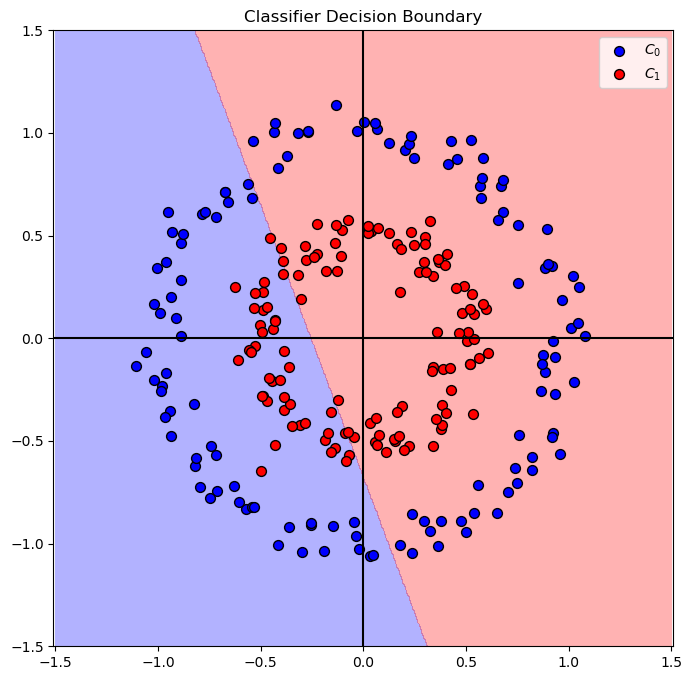

In [10]:
# Plot the Decision Boundary

hF, hA = plt.subplots(figsize = FIG_SIZE_DEF)
hA = PlotDecisionBoundary(oLinSvc.predict, hA)
hA = PlotBinaryClassData(mX, vY, hA = hA, axisTitle = 'Classifier Decision Boundary')
plt.show()


## Feature Transform

In this section we'll create a new set of features.  
We'll have 2 types of transformations:

1. Polynomial.
2. Polar Coordinates.

In order to apply the chain of operation: `X -> PolyFeatures -> Model` we'll create a SciKit Pipeline using [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).  
The concept of a pipeline is creating a SciKit Learn object (With the `fit()`, `predict()` approach) which chains multiple objects and allows simpler optimization of the whole process.

### Polynomial Features Transform

The features will model a higher degree polynomial base don the 2 given features (Coordinates).

Given the data as:

$$ X = \begin{bmatrix} \boldsymbol{x}_{1} & \boldsymbol{x}_{2} \end{bmatrix} $$

We'll generate the matrix:

$$ \bar{X} = \begin{bmatrix} \boldsymbol{x}_{1} & \boldsymbol{x}_{2} & \boldsymbol{x}_{1} \otimes \boldsymbol{x}_{1} & \boldsymbol{x}_{2} \otimes \boldsymbol{x}_{2} & \boldsymbol{x}_{1} \otimes \boldsymbol{x}_{2} & \dots \end{bmatrix} $$

Where $\otimes$ is the [Kronecker Product](https://en.wikipedia.org/wiki/Kronecker_product), element wise multiplication. 

Basically we create all inter multiplication up to order $p$ of the data.  
This is done using [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) from the `preprocessing` module of SciKit Learn.


* <font color='red'>(**?**)</font> Given we're using the SVM model, do we need the term $\boldsymbol{1}$ in our features? Look at the `include_bias` parameter in `PolynomialFeatures`.
* <font color='red'>(**?**)</font> Why is the `polyDeg` parameter set to 2?

In [11]:
polyDeg

2

In [12]:
# Construct the PolynomialFeatures Object



# Generate a new feature matrix consisting of all polynomial combinations of the features 
# with degree less than or equal to the specified degree. For example, if an input sample 
# is two dimensional and of the form [a, b], the degree-2 polynomial features are 
# [1, a, b, a^2, ab, b^2].


# include_biasbool, default=True
#     If True (default), then include a bias column,
#  the feature in which all polynomial powers are zero 
# (i.e. a column of ones - acts as an intercept term in a linear model).


#===========================Fill This===========================#
# 1. Set the `degree` and pay attention to `include_bias` parameter.
oPolyTrns = PolynomialFeatures(degree = polyDeg, include_bias = False)
#===============================================================#

In [13]:
# Feature Generation
# Generate a set of features by applying the transformations.

#===========================Fill This===========================#
# 1. Read about the fit() and transform() methods of PolynomialFeatures.
 
#  fit(X, y=None)[source]
#    Compute number of output features

#  transform(X)[source]
#   Transform data to polynomial features.

# 2. Use the methods to apply the feature transform.
oPolyTrns = oPolyTrns.fit(mX)
mX1 = oPolyTrns.transform(mX)
#===============================================================#

In [14]:
print(f'shape of the original data: {mX.shape}')
print(f'shape of the transformed data: {mX1.shape}')

shape of the original data: (250, 2)
shape of the transformed data: (250, 5)


In [15]:
# SVM Linear Model
# Apply a linear model on the transformed features.

vAcc = np.zeros(shape = len(lC)) #<! Array of accuracy

#===========================Fill This===========================#
# 1. Iterate over the parameters in `lC`.
# 2. Score each model.
# 3. Extract the best model.
# !! Make sure to use the transformed features.

for ii, C in enumerate(lC):
    oLinSvc  = SVC(C=C , kernel= kernelType).fit(mX1,vY) #<! Model definition and training
    vAcc[ii] = oLinSvc.score(mX1, vY) #<! Accuracy

bestModelIdx    = np.argmax(vAcc)
bestC           = lC[bestModelIdx]

oLinSvc = SVC(C=bestC , kernel= kernelType).fit(mX1,vY) #<! Best model

#===============================================================#

print(f'The best model with C = {bestC:0.2f} achieved accuracy of {vAcc[bestModelIdx]:0.2%}')

The best model with C = 0.25 achieved accuracy of 99.60%


#### Decision Boundary

* <font color='red'>(**?**)</font> Can we apply the trained model on the original feature set? Think about dimensions of the data.

In order to plot the _decision boundary_ over the original features we need to have a single object, with the `predict()` method to apply both the pre processing and the prediction.  
This is the basic concept behind a pipeline in SciKit Learn.

* <font color='brown'>(**#**)</font> Later on we'll use this concept for the training step as well.

In [16]:
# Build the Pipeline

#===========================Fill This===========================#
# 1. Construct the pipeline object.
# 2. The 1st step is `Transformer` which applies the polynomial transformation.
# 3. The 2nd step is `Classifier` which applies the classifier.
oModelPipe = Pipeline([('Transformer', oPolyTrns), ('Classifier', oLinSvc)])
#===============================================================#

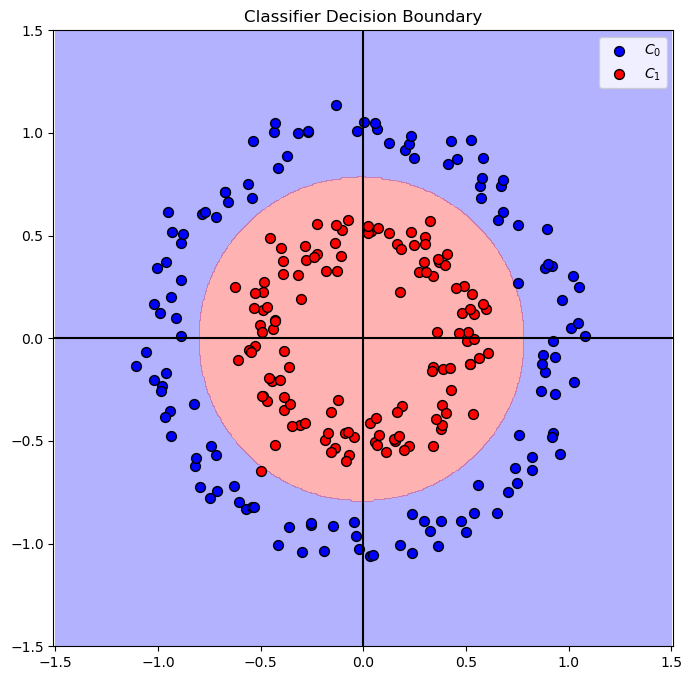

In [17]:
# Plot the Decision Boundary

hF, hA = plt.subplots(figsize = FIG_SIZE_DEF)
hA = PlotDecisionBoundary(oModelPipe.predict, hA)
hA = PlotBinaryClassData(mX, vY, hA = hA, axisTitle = 'Classifier Decision Boundary')
plt.show()

### Polar Coordinates

In this section we'll replace the features with the following model:

$$ \phi \left( {x}_{1}, {x}_{2} \right) \to \left( \sqrt{ {x}_{1}^{2} + {x}_{2}^{2} }, \angle \left( {x}_{1}, {x}_{2} \right) \right) $$

Where $\angle \left( {x}_{1}, {x}_{2} \right)$ is the angle between the point $\left( {x}_{1}, {x}_{2} \right)$ to the positive direction of ${x}_{1}$ axis.

* <font color='brown'>(**#**)</font> This is an example of a _domain knowledge_ like transformation while the previous case is _AutoML_ case.

Then we'll show the decision boundary of the best model.

* <font color='red'>(**?**)</font> What do you expect the decision boundary to like in this time?

The tasks:

1. Create a transformer sub class to apply the data transformation.
2. Apply the transform on the data and plot it to verify it.
3. Create a pipeline based on the data using a pre defined parameters for the SVM model.
4. Train the pipeline using `fit()`.
5. Plot the decision boundary.

* <font color='brown'>(**#**)</font> Later on we'll learn how to control the parameters of the steps of a pipeline.


In [18]:
# The PolarCoordinatesTransformer Class
# This is a SciKit Learn transformer sub class.
# This class implements the `fit()`, `transform()` and `fit_transform()` methods.


class PolarCoordinatesTransformer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, mX, vY = None):
#===========================Fill This===========================#
# This method gets the input features and allocate memory for the transformed features.
# It also keeps, for later validation, the dimensions of the input data.
        numSamples  = mX.shape[0]
        dataDim     = mX.shape[1]
        if dataDim != 2:
            raise ValueError(f'The input data must have exactly 2 columns while it has {dataDim} columns')
        
        mZ = np.empty(shape = (numSamples, 2)) #<! Allocate output

        self.numSamples = numSamples
        self.dataDim    = dataDim
        self.mZ         = mZ

        return self
#===============================================================#
    
    def transform(self, mX):
#===========================Fill This===========================#
# This method applies the actual transform.
# It saves the transformations into `mZ`.
# The 1st column is the magnitude and the 2nd column is the angle.
        if ((mX.shape[0] != self.numSamples) or (mX.shape[1] != self.dataDim)):
            raise ValueError(f'The data to transform has a different dimensions than the data which defined in `fit()`')
        
        self.mZ[:, 0] = np.linalg.norm(mX, axis = 1) #<! Norm
        self.mZ[:, 1] = np.arctan2(mX[:, 1], mX[:, 0]) #<! Angle

        return self.mZ
#===========================Fill This===========================#

    def fit_transform(self, mX, vY = None, **fit_params):
        
        return super().fit_transform(mX, vY, **fit_params)

* <font color='blue'>(**!**)</font> The class above calculates ${\left\| \boldsymbol{x} \right\|}_{2}$. Implement ${\left\| \boldsymbol{x} \right\|}_{2}^{2}$ instead and compare results.
* <font color='red'>(**?**)</font> Which of the option would you chose for production?

In [19]:
# Transformer Object

#===========================Fill This===========================#
# 1. Construct the PolarCoordinatesTransformer object.
oPolarTrns = PolarCoordinatesTransformer()
#===============================================================#

In [20]:
# Apply Transformation

#===========================Fill This===========================#
# 1. Generate a set of features with the new feature.
# 2. Use fit_transform() to both fit and apply at once.
mX2 = oPolarTrns.fit_transform(mX)
#===============================================================#

In [21]:
print(f'shape of the original data: {mX.shape}')
print(f'shape of the transformed data: {mX2.shape}')


shape of the original data: (250, 2)
shape of the transformed data: (250, 2)


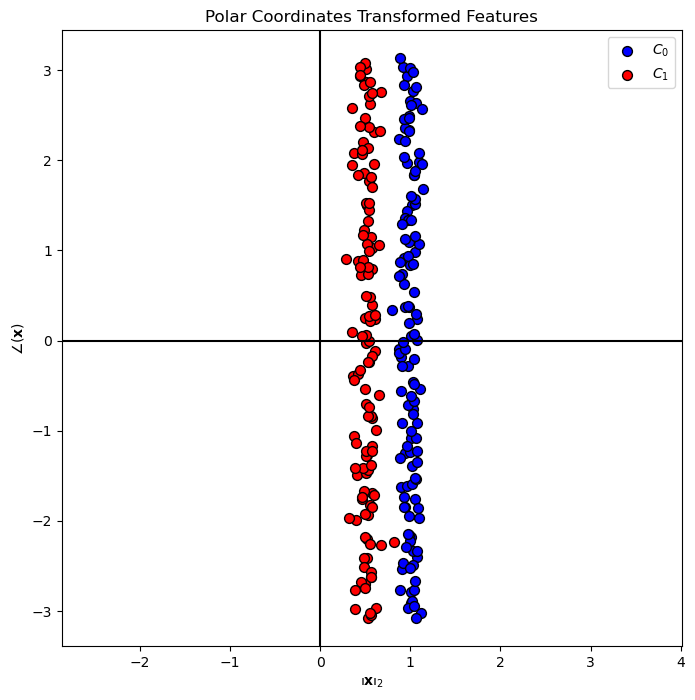

In [22]:
# Plot the Transformed Features
hF, hA = plt.subplots(figsize = FIG_SIZE_DEF)
hA = PlotBinaryClassData(mX2, vY, hA = hA, axisTitle = 'Polar Coordinates Transformed Features')
hA.set_xlabel(r'${\left\Vert \bf{x} \right\Vert}_{2}$')
hA.set_ylabel(r'$ \angle \left( \bf{x} \right) $')

plt.show()

In [23]:
# SVM Linear Model - On the Transformed Data

vAcc = np.zeros(shape = len(lC))

for ii, C in enumerate(lC):
    oLinSvc  = SVC(C = C, kernel = kernelType).fit(mX2, vY)
    vAcc[ii] = oLinSvc.score(mX2, vY)

bestModelIdx    = np.argmax(vAcc)
bestC           = lC[bestModelIdx]

oLinSvc = SVC(C = bestC, kernel = kernelType).fit(mX2, vY)

print(f'The best model with C = {bestC:0.2f} achieved accuracy of {vAcc[bestModelIdx]:0.2%}')


The best model with C = 0.10 achieved accuracy of 99.60%


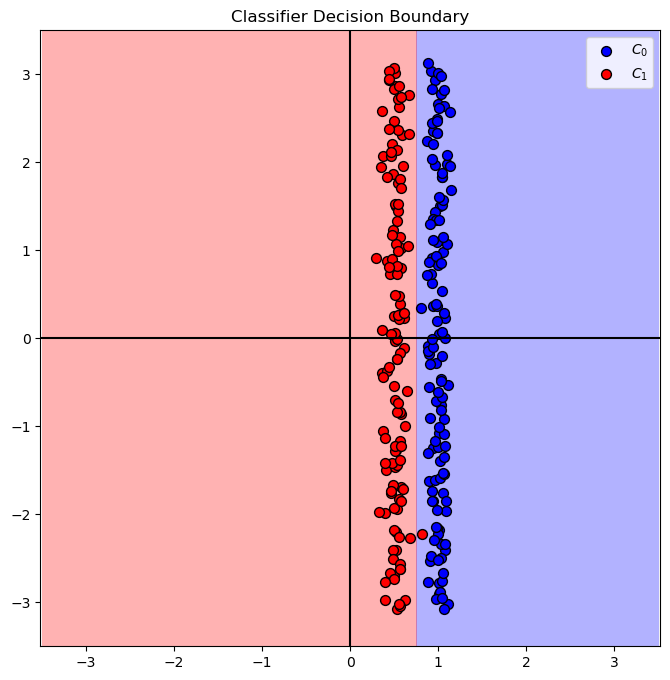

In [24]:
# Plot the Decision Boundary

PlotDecisionBoundary = PlotDecisionBoundaryClosure(numGridPts, 0, 2, -3.5, 3.5)

hF, hA = plt.subplots(figsize = FIG_SIZE_DEF)
hA = PlotDecisionBoundary(oLinSvc.predict, hA)
hA = PlotBinaryClassData(mX2, vY, hA = hA, axisTitle = 'Classifier Decision Boundary')
plt.show()

In [25]:
# Build the Pipeline

oPolarTrns = oPolarTrns.fit(np.zeros(shape = (numGridPts * numGridPts, 2))) #<! Fitting to the grid of the plot

#===========================Fill This===========================#
# 1. Construct the pipeline object.
# 2. The 1st step is `Transformer` which applies the polynomial transformation.
# 3. The 2nd step is `Classifier` which applies the classifier.
oModelPipe = Pipeline([('Transformer', oPolarTrns), ('Classifier', oLinSvc)])
#===============================================================#

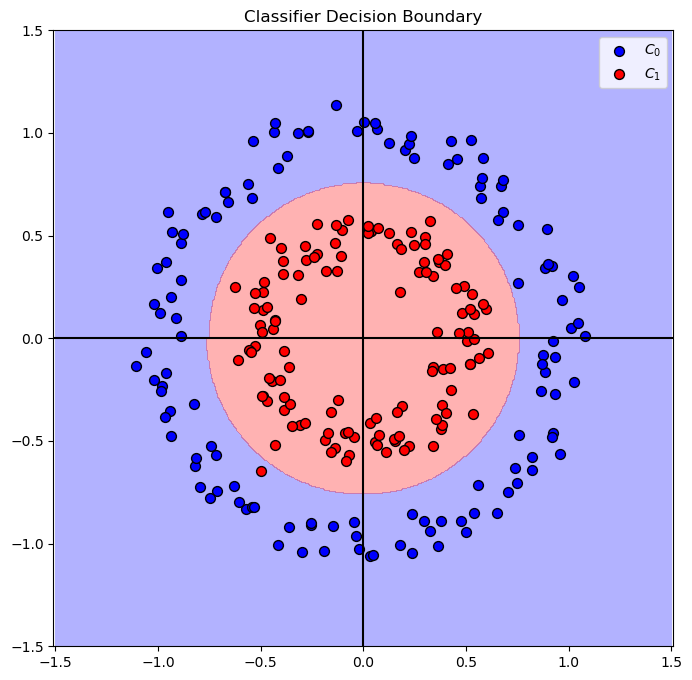

In [26]:
# Plot the Decision Boundary

PlotDecisionBoundary = PlotDecisionBoundaryClosure(numGridPts, -1.5, 1.5, -1.5, 1.5)

hF, hA = plt.subplots(figsize = FIG_SIZE_DEF)
hA = PlotDecisionBoundary(oModelPipe.predict, hA)
hA = PlotBinaryClassData(mX, vY, hA = hA, axisTitle = 'Classifier Decision Boundary')
plt.show()

* <font color='red'>(**?**)</font> Do we need both features?
* <font color='red'>(**?**)</font> How would you solve the case above?
* <font color='blue'>(**!**)</font> Try with random seed `seedNum = 512`. Explain results.